In [45]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
%matplotlib inline
plt.style.use('seaborn')

In [46]:
def generate_samples(n_samples, n_features, ax, seed):
    np.random.seed(seed)
    x = np.zeros(shape=(n_samples,n_features+1))
    
    x_rand = np.random.uniform( -1, +1, size = (n_samples,n_features))
    w_rand = np.random.uniform( -999, +999, size = (n_features+1,))
    y_true = []
    
    #generate random datapoints
    for i in range(0,n_samples):
        x[i] = [1] + [x_rand[i][j] for j in range(n_features)]
    
    #generate the y labels
    for i in range(len(x)):
        wTx_target = w_rand.dot(x[i].transpose())
        y_true.append(np.sign(wTx_target))
        
        #plot the data points on a scatter plot
        if(y_true[i] >= 0):
            ax.scatter(x[i][1],x[i][2], color = 'dodgerblue')
        else:   
            ax.scatter(x[i][1], x[i][2], color = 'brown') 
        
    return x, y_true, w_rand, ax

In [47]:
def target_function(n_samples, ax, x, y_true, w_init):
    
    x_vals = np.array(ax.get_xlim())
    
    #compute the slope and intercept of the target function 
    target_slope = -w_init[1]/w_init[2]
    target_intercept = -w_init[0]/w_init[2]
    
    target_line = x_vals * target_slope + target_intercept
    
    #plot the target function
    ax.plot(x_vals,target_line, color = 'k')
    
    return ax, x_vals  

In [48]:
def cal_classification_error(x, y, w):
    misclassified_pts = []
    
    #Evaluate whether the data points are classified based on the computed weights
    for i in range(len(x)):
        wTx = w.dot(x[i].transpose())
        
        if y[i]*wTx <= 0:
            misclassified_pts.append(i)
    
    #append the misclassified arrays for x and y
    new_x = [x[j] for j in misclassified_pts]
    new_y = [y[j] for j in misclassified_pts]
    
    #compute the error rate based on the number of misclassified points
    misclassfied_error = (len(misclassified_pts)/len(x))*100
    
    return len(misclassified_pts), misclassfied_error, new_x, new_y

In [49]:
def perceptron(x, y, hard_stop):
    w = np.array([0,0,0])
    iterations = 0
    train_x = x
    train_y = y
    acc = None
    
    while iterations < hard_stop:
        #pick a point at random and compute its wTx.
        idx = np.random.randint(0,len(train_x))
        wTx = w.dot(train_x[idx].transpose())
        
        #check for the signs, if doesn't match, update the weight
        if y[idx]*wTx <= 0:
            w = w + train_y[idx]*train_x[idx]
            
        #calculate the new training data set(the misclassified points become the new training dataset).
        n_misclassified_pts, misclassfied_error,train_x,train_y = cal_classification_error(x,y,w)
        if n_misclassified_pts == 0:
            break
            
        iterations += 1
    
    return w, iterations, n_misclassified_pts, misclassfied_error          

In [50]:
def plot_boundary(w, ax, points,accuracy): 
    
    legend_elements = [Line2D([0],[0], color='black', lw=2, label='Target Function, f'),
                       Line2D([0],[0], color='red', lw=2, label='Final Hypothesis, g'),
                       Line2D([0], [0], marker='o', color='dodgerblue', label='y = +1',markersize=7),
                       Line2D([0], [0], marker='o', color='brown', label='y = -1',markersize=7)]
    
    #compute the slope and intercept for the final hypothesis 
    final_slope = -1*(w[1]/w[2])  
    final_intercept = -1*(w[0]/w[2])
    
    #compute the final hypothesis
    y_pred = points * final_slope + final_intercept
    
    #plot the final hypothesis
    ax.plot(points,y_pred,color = 'r')
    ax.legend(handles=legend_elements, loc='lower right', bbox_to_anchor=(1.25, 0.75), fontsize=10.5)

    return final_slope, final_intercept

#### Question a) Generate Dataset-1 of size 20

(-1.0, 1.0)

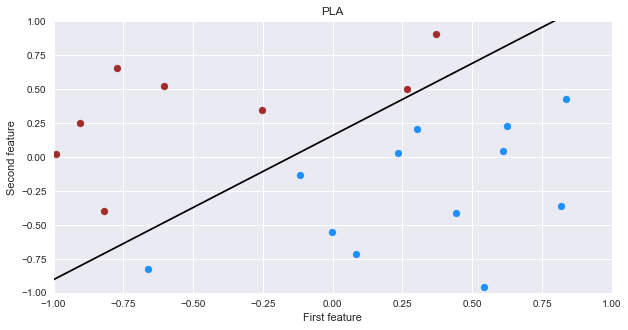

In [51]:
n_samples = 20
n_features = 2
seed = 10

fig, ax = plt.subplots(figsize=(10,5))

#generate a random input dataset and their corresponding labels
x, y_true, w_init, ax = generate_samples(n_samples, n_features, ax, seed)

#plot the target function
ax, points = target_function(n_samples, ax, x, y_true, w_init)

#Set the plot parameters
plt.title("PLA")
plt.xlabel("First feature")
plt.ylabel("Second feature")
ax.set_xlim(-1,+1)
ax.set_ylim(-1,+1)

#### Question b) Running Perceptron() and plotting the final hypothesis for Dataset-1 of size 20

Total number of updates before the algorithm converged: 16
Error rate: 0.0%
As in (b), the Final hypothesis 'g' manages to classify all the points based on their label.


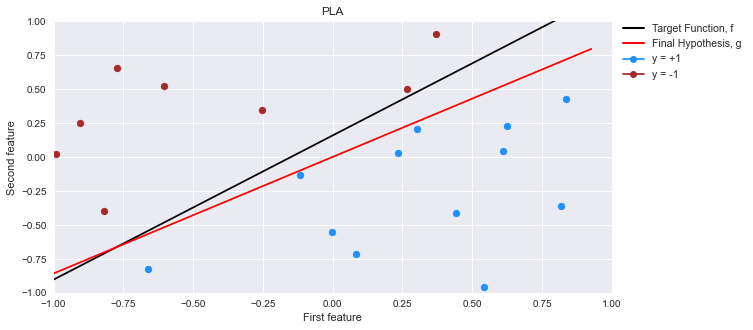

In [52]:
n_samples = 20
n_features = 2
seed = 10

fig, ax = plt.subplots(figsize=(10,5))

#generate a random input dataset and their corresponding labels
x, y_true, w_init, ax = generate_samples(n_samples, n_features, ax, seed)

#plot the target function
ax, points = target_function(n_samples, ax, x, y_true, w_init)

#Set the plot parameters
plt.title("PLA")
plt.xlabel("First feature")
plt.ylabel("Second feature")
ax.set_xlim(-1,+1)
ax.set_ylim(-1,+1)

#compute the hypothesis function using PLA
w, iterations,n_misclassified_pts, misclassfied_error = perceptron(x, y_true, 1000)

#plot the hypothesis function
final_slope, final_intercept = plot_boundary(w, ax, points,misclassfied_error)

print("Total number of updates before the algorithm converged: {}".format(iterations))
print("Error rate: {}%".format(misclassfied_error))
print("As in (b), the Final hypothesis 'g' manages to classify all the points based on their label.")

#### Question c) Running Perceptron() and plotting the final hypothesis for Dataset-2 of size 20

Total number of updates before the algorithm converged: 20
Error rate: 0.0%
As in (b), the Final hypothesis 'g' manages to classify all the points based on their label.


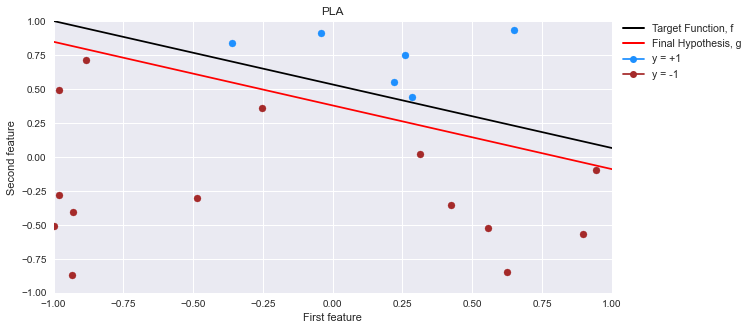

In [53]:
n_samples = 20
n_features = 2
seed = 13

fig, ax = plt.subplots(figsize=(10,5))

#generate a random input dataset and their corresponding labels
x, y_true, w_init, ax = generate_samples(n_samples, n_features, ax, seed)

#plot the target function
ax, points = target_function(n_samples, ax, x, y_true, w_init)

#Set the plot parameters
plt.title("PLA")
plt.xlabel("First feature")
plt.ylabel("Second feature")
ax.set_xlim(-1,+1)
ax.set_ylim(-1,+1)

#compute the hypothesis function using PLA
w, iterations,n_misclassified_pts, misclassfied_error = perceptron(x, y_true, 1000)

#plot the hypothesis function
final_slope, final_intercept = plot_boundary(w, ax, points,misclassfied_error)

print("Total number of updates before the algorithm converged: {}".format(iterations))
print("Error rate: {}%".format(misclassfied_error))
print("As in (b), the Final hypothesis 'g' manages to classify all the points based on their label.")

#### Question d) Running Perceptron() and plotting the final hypothesis for Dataset-3 of size 100

Total number of updates before the algorithm converged: 24
Error rate: 0.0%
As in (b), the Final hypothesis 'g' manages to classify all the points based on their label.
Also, the Final hypothesis 'g' and Target function 'f' are very close to each other.


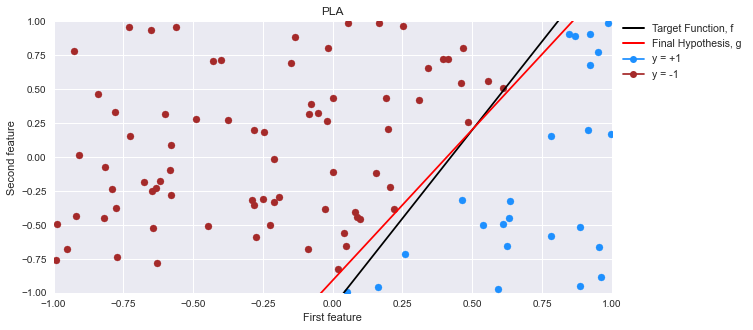

In [54]:
n_samples = 100
n_features = 2
seed = 100

fig, ax = plt.subplots(figsize=(10,5))

#generate a random input dataset and their corresponding labels
x, y_true, w_init, ax = generate_samples(n_samples, n_features, ax, seed)

#plot the target function
ax, points = target_function(n_samples, ax, x, y_true, w_init)

#Set the plot parameters
plt.title("PLA")
plt.xlabel("First feature")
plt.ylabel("Second feature")
ax.set_xlim(-1,+1)
ax.set_ylim(-1,+1)

#compute the hypothesis function using PLA
w, iterations,n_misclassified_pts, misclassfied_error = perceptron(x, y_true, 1000)

#plot the hypothesis function
final_slope, final_intercept = plot_boundary(w, ax, points,misclassfied_error)

print("Total number of updates before the algorithm converged: {}".format(iterations))
print("Error rate: {}%".format(misclassfied_error))
print("As in (b), the Final hypothesis 'g' manages to classify all the points based on their label.")
print("Also, the Final hypothesis 'g' and Target function 'f' are very close to each other.")

#### Question e) Running Perceptron() and plotting the final hypothesis for Dataset-3 of size 1000

Total number of updates before the algorithm converged: 1000
Error rate: 0.3%
As the number of data samples are growing, we could see that the number of iterations before the algorithm converges is pretty high.
Unlike in (b), here, there are a few outliers which forestall the algorithm from converging.
However, the Final hypothesis 'g' and Target function 'f' are nearly identical.


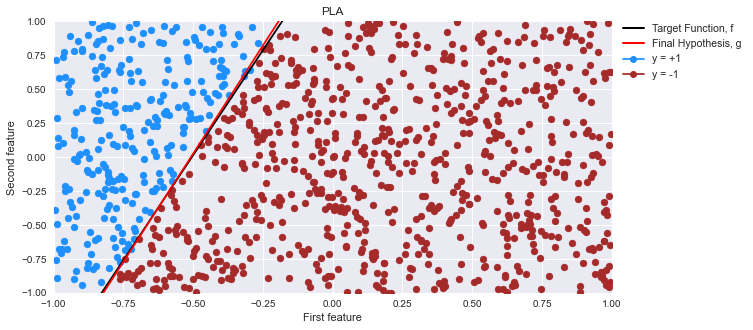

In [55]:
n_samples = 1000
n_features = 2
seed = 100

fig, ax = plt.subplots(figsize=(10,5))

#generate a random input dataset and their corresponding labels
x, y_true, w_init, ax = generate_samples(n_samples, n_features, ax, seed)

#plot the target function
ax, points = target_function(n_samples, ax, x, y_true, w_init)

#Set the plot parameters
plt.title("PLA")
plt.xlabel("First feature")
plt.ylabel("Second feature")
ax.set_xlim(-1,+1)
ax.set_ylim(-1,+1)

#compute the hypothesis function using PLA
w, iterations,n_misclassified_pts, misclassfied_error = perceptron(x, y_true, 1000)

#plot the hypothesis function
final_slope, final_intercept = plot_boundary(w, ax, points,misclassfied_error)

print("Total number of updates before the algorithm converged: {}".format(iterations))
print("Error rate: {}%".format(misclassfied_error))
print("As the number of data samples are growing, we could see that the number of iterations before the algorithm converges is pretty high.")
print("Unlike in (b), here, there are a few outliers which forestall the algorithm from converging.")
print("However, the Final hypothesis 'g' and Target function 'f' are nearly identical.")